In [2]:
%%capture
!pip install keras-ocr
!pip install pytesseract

In [ ]:
!pip install Pillow==9.0.0

In [ ]:
!sudo apt install tesseract-ocr-kor

In [110]:
!pip list | grep keras-ocr

keras-ocr                     0.9.1


In [1]:
import matplotlib.pyplot as plt
import keras_ocr
import os
import pytesseract
from PIL import Image
from pytesseract import Output
import matplotlib.image as img
%matplotlib inline


print(keras_ocr.__version__)
print(pytesseract.__version__)

# keras-ocr이 detector과 recognizer를 위한 모델을 자동으로 다운로드받게 됩니다. 
pipeline = keras_ocr.pipeline.Pipeline()

0.9.1
0.3.9
Looking for /root/.keras-ocr/craft_mlt_25k.h5
Looking for /root/.keras-ocr/crnn_kurapan.h5


# Step1. 검증용 데이터셋 준비

검증용 텍스트 포함 사진

In [15]:
img_path = '/content/drive/MyDrive/Data/001CV/OCR'
img_eng = '/content/drive/MyDrive/Data/001CV/OCR/eng'
img_kor = '/content/drive/MyDrive/Data/001CV/OCR/kor'
engs = os.listdir(img_eng)
kors = os.listdir(img_kor)

In [3]:
engs

['junior-usuanlele-oshodi-rNkkd2L0ITw-unsplash.jpg',
 'john-cameron-gS7BU-P69LE-unsplash.jpg',
 'redd-c2x94-kmQcQ-unsplash.jpg',
 'thirdy-perasol-wNAV-gDRINU-unsplash.jpg',
 'david-travis-l9GSjgjE_rs-unsplash.jpg',
 'bp-miller-pD9oO3cRUJs-unsplash.jpg',
 'jon-tyson-lNScN0DMk7U-unsplash.jpg',
 'pawel-czerwinski-3DT_d9ttbv0-unsplash.jpg',
 'bram-tXtRVye5oLA-unsplash.jpg']

In [4]:
kors

['bbm_kor.jpg', 'menu_kor.jpg']

이미지를 불러오는 방법은 성현님 깃허브 참고

https://github.com/seonghyun97/Aiffel_Exploration/blob/master/%5BE-12%5DReadCharacter.ipynb

In [5]:
def figure_show(dirs,lists):
    plt.figure(figsize=(20,20))
    for idx, im in enumerate(lists):
        im =  dirs +'/'+ im
        plt.subplot(2,5, idx+1)
        im = img.imread(im)
        plt.imshow(im)
        plt.axis('off')

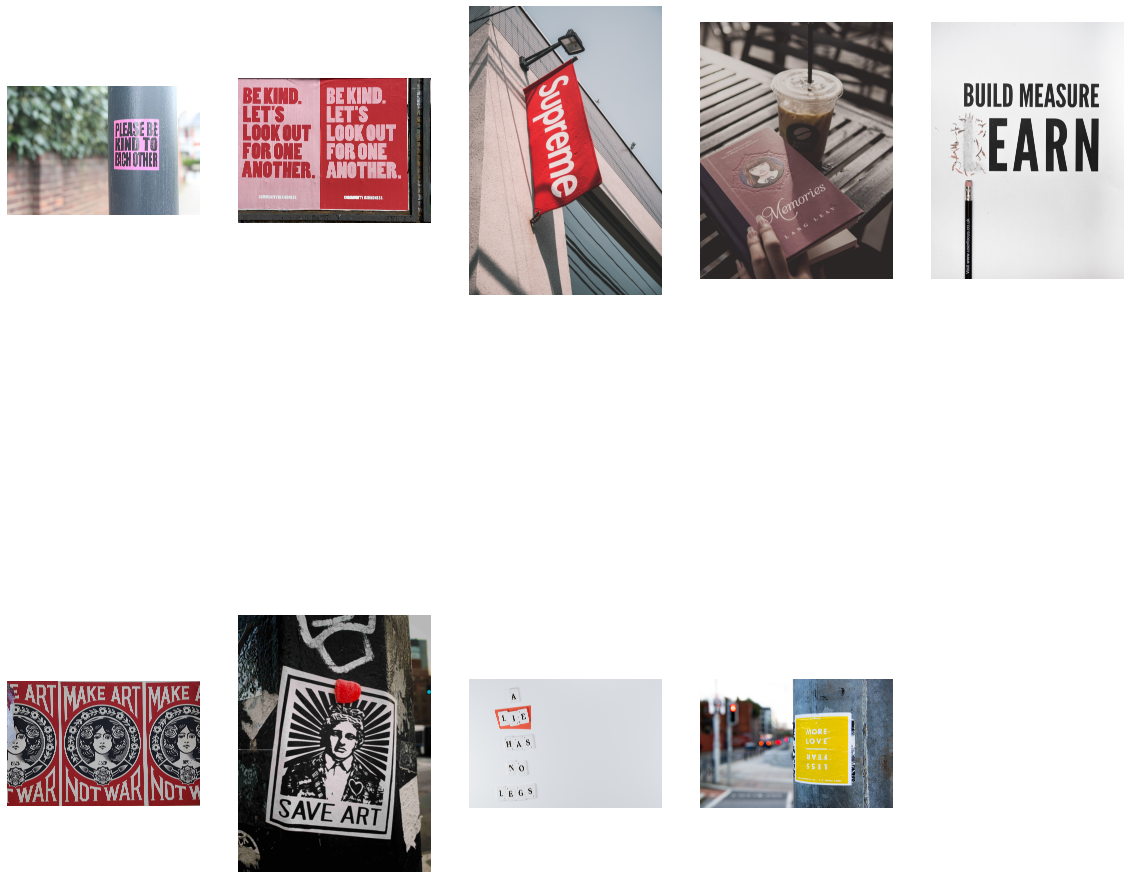

In [6]:
figure_show(img_eng,engs)

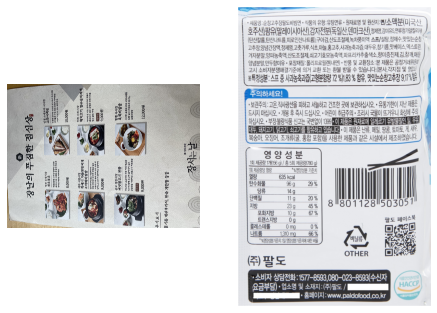

In [9]:
figure_show(img_kor,kors)

# Step2. keras-ocr, Tesseract로 테스트 진행(Google OCR API는 선택 사항)

## Keras-OCR

In [79]:
images_eng = [ img_eng +'/'+ im for im in engs ]
images_kor = [img_kor +'/'+ im for im in kors]

In [80]:
images_eng

['/content/drive/MyDrive/Data/001CV/OCR/eng/junior-usuanlele-oshodi-rNkkd2L0ITw-unsplash.jpg',
 '/content/drive/MyDrive/Data/001CV/OCR/eng/john-cameron-gS7BU-P69LE-unsplash.jpg',
 '/content/drive/MyDrive/Data/001CV/OCR/eng/redd-c2x94-kmQcQ-unsplash.jpg',
 '/content/drive/MyDrive/Data/001CV/OCR/eng/thirdy-perasol-wNAV-gDRINU-unsplash.jpg',
 '/content/drive/MyDrive/Data/001CV/OCR/eng/david-travis-l9GSjgjE_rs-unsplash.jpg',
 '/content/drive/MyDrive/Data/001CV/OCR/eng/bp-miller-pD9oO3cRUJs-unsplash.jpg',
 '/content/drive/MyDrive/Data/001CV/OCR/eng/jon-tyson-lNScN0DMk7U-unsplash.jpg',
 '/content/drive/MyDrive/Data/001CV/OCR/eng/pawel-czerwinski-3DT_d9ttbv0-unsplash.jpg',
 '/content/drive/MyDrive/Data/001CV/OCR/eng/bram-tXtRVye5oLA-unsplash.jpg']

In [8]:
prediction_groups_eng = [pipeline.recognize([url]) for url in images_eng]

In [47]:
prediction_groups_eng

[[[('be', array([[3726.    ,  966.9375],
           [4060.125 ,  966.9375],
           [4060.125 , 1341.5625],
           [3726.    , 1341.5625]], dtype=float32)),
   ('pleast', array([[2896.6006,  981.6816],
           [3779.1096,  966.7237],
           [3785.4805, 1342.6136],
           [2902.9714, 1357.5717]], dtype=float32)),
   ('king', array([[2901.7854, 1388.2649],
           [3572.2756, 1374.2964],
           [3579.6619, 1728.8339],
           [2909.1716, 1742.8024]], dtype=float32)),
   ('te', array([[3650.0625, 1382.0625],
           [4060.125 , 1382.0625],
           [4060.125 , 1741.5   ],
           [3650.0625, 1741.5   ]], dtype=float32)),
   ('each', array([[2895.75 , 1771.875],
           [3351.375, 1771.875],
           [3351.375, 2156.625],
           [2895.75 , 2156.625]], dtype=float32)),
   ('other', array([[3366.5625, 1771.875 ],
           [4065.1875, 1771.875 ],
           [4065.1875, 2166.75  ],
           [3366.5625, 2166.75  ]], dtype=float32))]],
 [[('be', a

AttributeError: ignored

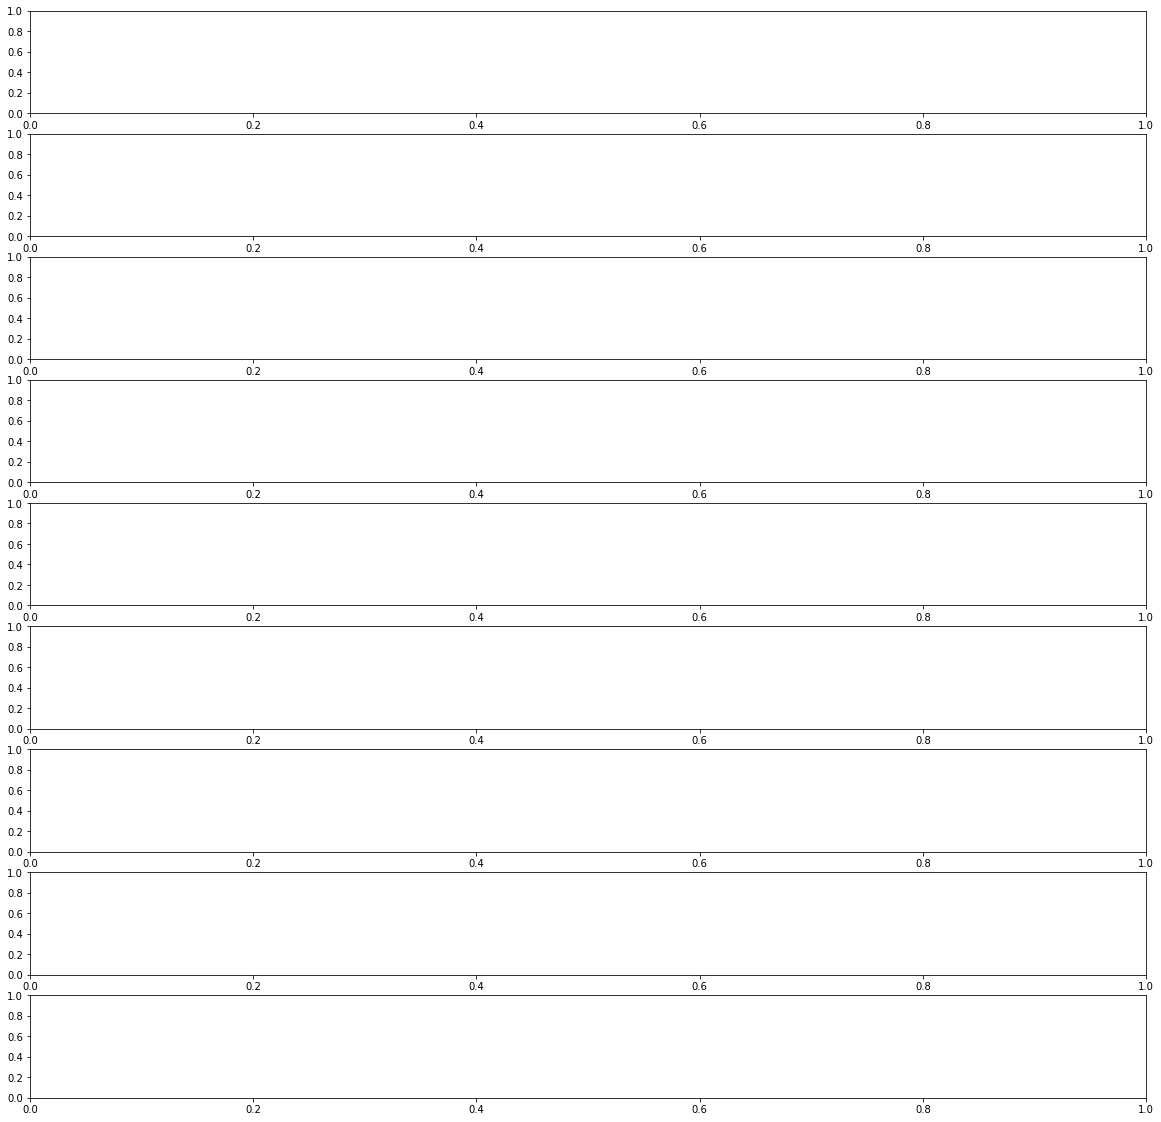

In [58]:
# Plot the predictions
fig, axs = plt.subplots(nrows=len(images_eng), figsize=(20, 20))
for idx, ax in enumerate(axs):
    keras_ocr.tools.drawAnnotations(image=images_eng[idx], 
                                    predictions=prediction_groups_eng[idx][0], ax=ax)

에러 메시지에서 str 타입엔 copy 메서드가 없다고 한다. ~~그건 나도 알아..~~



In [57]:
prediction_groups_eng[1][:][0]

[('be', array([[107.953125, 196.6289  ],
         [474.22266 , 196.6289  ],
         [474.22266 , 524.34375 ],
         [107.953125, 524.34375 ]], dtype=float32)),
 ('aerd', array([[ 528.3051 ,  191.36923],
         [1326.6229 ,  216.71257],
         [1316.1094 ,  547.888  ],
         [ 517.79156,  522.5447 ]], dtype=float32)),
 ('aini', array([[2201.4727,  196.6289],
         [3045.8203,  196.6289],
         [3045.8203,  528.1992],
         [2201.4727,  528.1992]], dtype=float32)),
 ('be', array([[1812.0703 ,  200.48438],
         [2189.9062 ,  200.48438],
         [2189.9062 ,  535.91016],
         [1812.0703 ,  535.91016]], dtype=float32)),
 ('lets', array([[1806.523  ,  556.174  ],
         [2675.222  ,  572.56445],
         [2668.938  ,  905.6166 ],
         [1800.239  ,  889.22614]], dtype=float32)),
 ('lets', array([[107.82852, 561.5386 ],
         [965.2257 , 589.8045 ],
         [954.5187 , 914.5819 ],
         [ 97.12153, 886.3159 ]], dtype=float32)),
 ('look', array([[ 104.8

이때의 나는 3차원 리스트를 읽어들이는 곳에서 문제가 있는 줄 알았다.

## 오류가 해결이 안되어서 다른 코드로 실행해 보았다.

레퍼런스 홍 감사!

In [105]:
images_eng = [keras_ocr.tools.read(os.path.join(img_eng, en)) for en in engs]
# prediction_groups = [pipeline.recognize([os.path.join(img_eng, en)]) for en in engs]

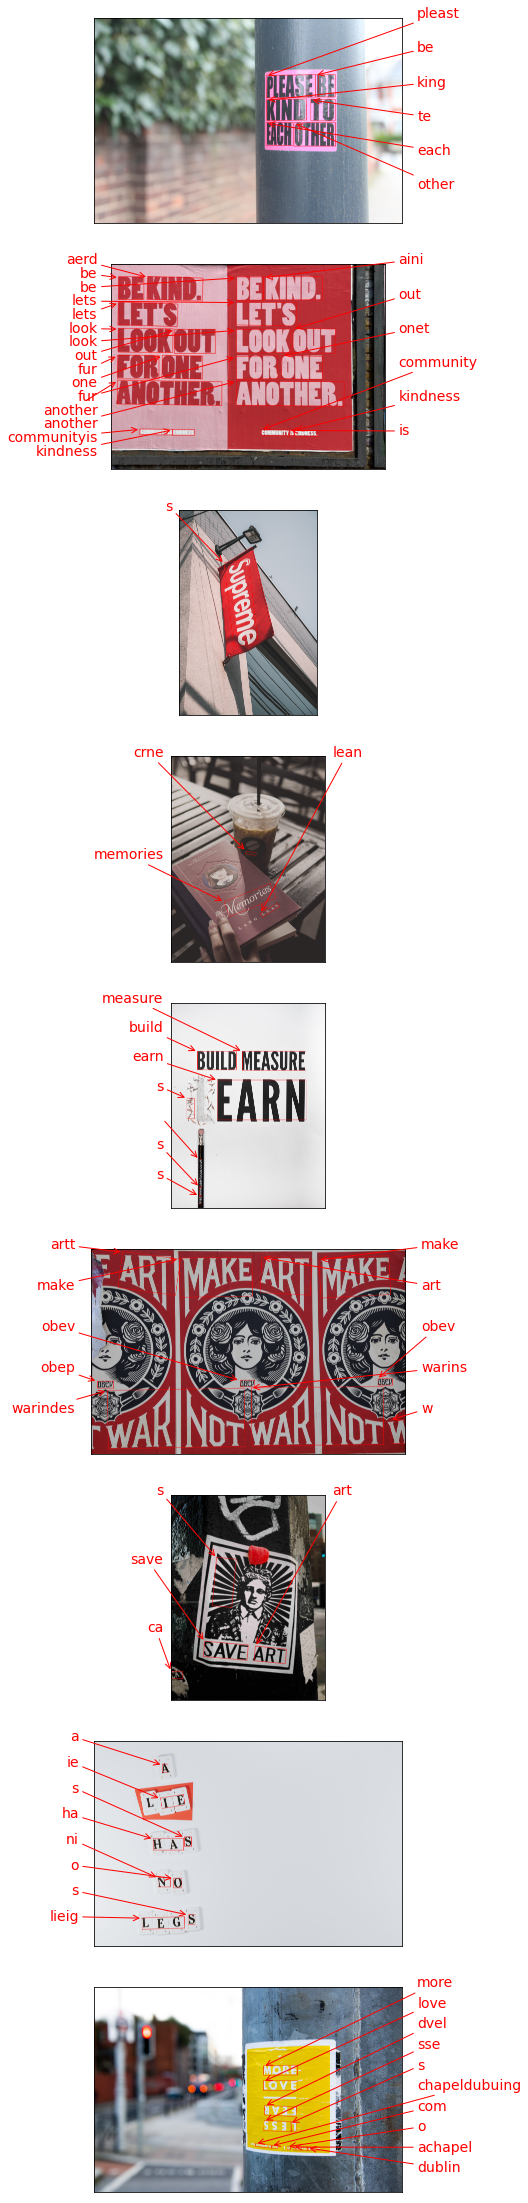

In [107]:
fig, axs = plt.subplots(nrows=len(images_eng), figsize=(40, 40))
for idx, ax in enumerate(axs):
    keras_ocr.tools.drawAnnotations(image=images_eng[idx], 
                                        predictions=prediction_groups[idx][0], ax=ax)

멀쩡히 잘 실행된다 그래서 다른 리스트들을 뜯어봤다.

In [69]:
prediction_groups

[[[('be', array([[3726.    ,  966.9375],
           [4060.125 ,  966.9375],
           [4060.125 , 1341.5625],
           [3726.    , 1341.5625]], dtype=float32)),
   ('pleast', array([[2896.6006,  981.6816],
           [3779.1096,  966.7237],
           [3785.4805, 1342.6136],
           [2902.9714, 1357.5717]], dtype=float32)),
   ('king', array([[2901.7854, 1388.2649],
           [3572.2756, 1374.2964],
           [3579.6619, 1728.8339],
           [2909.1716, 1742.8024]], dtype=float32)),
   ('te', array([[3650.0625, 1382.0625],
           [4060.125 , 1382.0625],
           [4060.125 , 1741.5   ],
           [3650.0625, 1741.5   ]], dtype=float32)),
   ('each', array([[2895.75 , 1771.875],
           [3351.375, 1771.875],
           [3351.375, 2156.625],
           [2895.75 , 2156.625]], dtype=float32)),
   ('other', array([[3366.5625, 1771.875 ],
           [4065.1875, 1771.875 ],
           [4065.1875, 2166.75  ],
           [3366.5625, 2166.75  ]], dtype=float32))]],
 [[('be', a

Prediciton group확인 결과 내가 작성한 코드와 같다는 것을 발견했다.

In [67]:
images_eng

[array([[[ 90, 116, 103],
         [ 85, 111,  98],
         [ 82, 108,  95],
         ...,
         [255, 255, 255],
         [255, 255, 255],
         [255, 255, 255]],
 
        [[ 89, 115, 102],
         [ 87, 113, 100],
         [ 86, 112,  99],
         ...,
         [255, 255, 255],
         [255, 255, 255],
         [255, 255, 255]],
 
        [[ 89, 117, 103],
         [ 88, 116, 102],
         [ 89, 117, 103],
         ...,
         [255, 255, 255],
         [255, 255, 255],
         [255, 255, 255]],
 
        ...,
 
        [[224, 199, 192],
         [225, 200, 193],
         [225, 200, 193],
         ...,
         [251, 250, 246],
         [251, 250, 246],
         [251, 250, 246]],
 
        [[226, 198, 194],
         [226, 198, 194],
         [227, 199, 195],
         ...,
         [251, 250, 246],
         [251, 250, 246],
         [251, 250, 246]],
 
        [[226, 198, 194],
         [226, 198, 194],
         [227, 199, 195],
         ...,
         [251, 250, 246],
  

#### !!!찾았다 범인!!!!

아래 코드로 변경 후 다시 실행시켜봤다.

In [70]:
images_en = [ keras_ocr.tools.read(dir) for dir in images_eng]

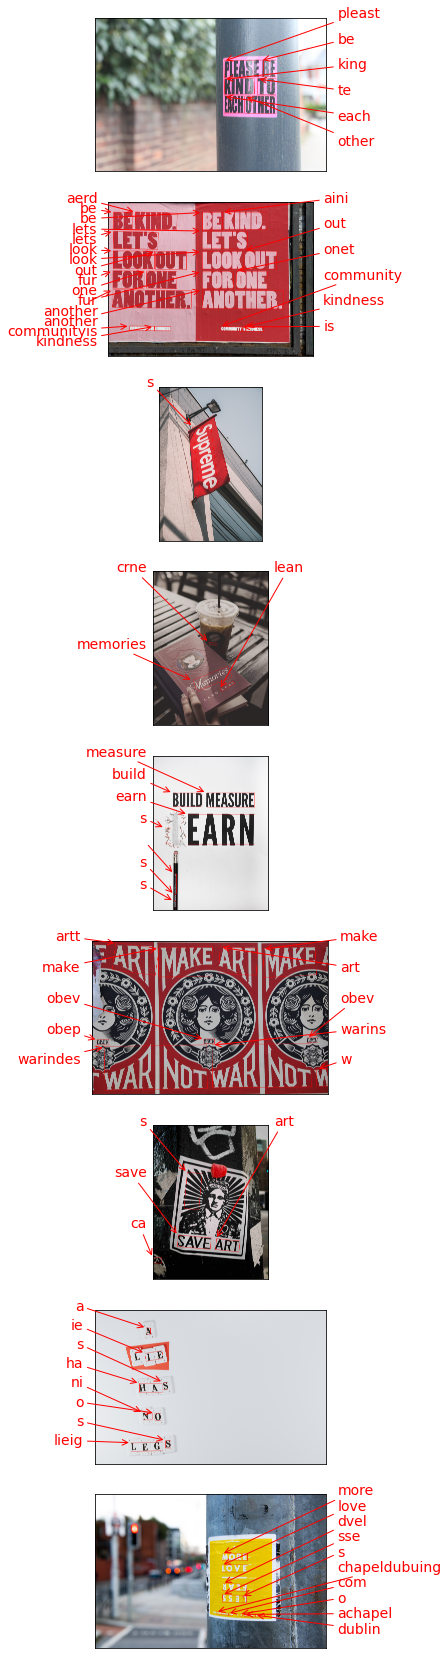

In [72]:
fig, axs = plt.subplots(nrows=len(images_en), figsize=(30, 30))
for idx, ax in enumerate(axs):
    keras_ocr.tools.drawAnnotations(image=images_en[idx], 
                                    predictions=prediction_groups_eng[idx][0], ax=ax)

## 교훈 ::  앞으로는 코드 잘 읽어봐야겠다....

keras_ocr.tools.read 함수가 그냥 url읽어와서 보여주는 기능인줄 알고 images_eng에 리스트로 경로만 저장한게 화근이었다.

## Tesseract-OCR

In [73]:
# OCR Engine modes(–oem):
# 0 - Legacy engine only.
# 1 - Neural nets LSTM engine only.
# 2 - Legacy + LSTM engines.
# 3 - Default, based on what is available.

# Page segmentation modes(–psm):
# 0 - Orientation and script detection (OSD) only.
# 1 - Automatic page segmentation with OSD.
# 2 - Automatic page segmentation, but no OSD, or OCR.
# 3 - Fully automatic page segmentation, but no OSD. (Default)
# 4 - Assume a single column of text of variable sizes.
# 5 - Assume a single uniform block of vertically aligned text.
# 6 - Assume a single uniform block of text.
# 7 - Treat the image as a single text line.
# 8 - Treat the image as a single word.
# 9 - Treat the image as a single word in a circle.
# 10 - Treat the image as a single character.
# 11 - Sparse text. Find as much text as possible in no particular order.
# 12 - Sparse text with OSD.
# 13 - Raw line. Treat the image as a single text line, bypassing hacks that are Tesseract-specific.

def crop_word_regions_eng(image_path='./images/sample.png', output_path='./output'):
    if not os.path.exists(output_path):
        os.mkdir(output_path)
    custom_oem_psm_config = r'--oem 3 --psm 3'
    image = Image.open(image_path)

    recognized_data = pytesseract.image_to_data(
        image, lang='eng',    # 한국어라면 lang='kor'
        config=custom_oem_psm_config,
        output_type=Output.DICT
    )
    
    top_level = max(recognized_data['level'])
    index = 0
    cropped_image_path_list = []
    for i in range(len(recognized_data['level'])):
        level = recognized_data['level'][i]
    
        if level == top_level:
            left = recognized_data['left'][i]
            top = recognized_data['top'][i]
            width = recognized_data['width'][i]
            height = recognized_data['height'][i]
            
            output_img_path = os.path.join(output_path, f"{str(index).zfill(4)}.png")
            print(output_img_path)
            cropped_image = image.crop((
                left,
                top,
                left+width,
                top+height
            ))
            cropped_image.save(output_img_path)
            cropped_image_path_list.append(output_img_path)
            index += 1
    return cropped_image_path_list

In [74]:
def crop_word_regions_kor(image_path='./images/sample.png', output_path='./output'):
    if not os.path.exists(output_path):
        os.mkdir(output_path)
    custom_oem_psm_config = r'--oem 3 --psm 3'
    image = Image.open(image_path)

    recognized_data = pytesseract.image_to_data(
        image, lang='kor',    # 한국어라면 lang='kor'
        config=custom_oem_psm_config,
        output_type=Output.DICT
    )
    
    top_level = max(recognized_data['level'])
    index = 0
    cropped_image_path_list = []
    for i in range(len(recognized_data['level'])):
        level = recognized_data['level'][i]
    
        if level == top_level:
            left = recognized_data['left'][i]
            top = recognized_data['top'][i]
            width = recognized_data['width'][i]
            height = recognized_data['height'][i]
            
            output_img_path = os.path.join(output_path, f"{str(index).zfill(4)}.png")
            print(output_img_path)
            cropped_image = image.crop((
                left,
                top,
                left+width,
                top+height
            ))
            cropped_image.save(output_img_path)
            cropped_image_path_list.append(output_img_path)
            index += 1
    return cropped_image_path_list

In [77]:
def recognize_images_kor(cropped_image_path_list):
    custom_oem_psm_config = r'--oem 3 --psm 7'
    
    for image_path in cropped_image_path_list:
        image = Image.open(image_path)
        recognized_data = pytesseract.image_to_string(
            image, lang='kor',    # 한국어라면 lang='kor'
            config=custom_oem_psm_config,
            output_type=Output.DICT
        )
        print(recognized_data['text'])
    print("Done")

def recognize_images_eng(cropped_image_path_list):
    custom_oem_psm_config = r'--oem 3 --psm 7'
    
    for image_path in cropped_image_path_list:
        image = Image.open(image_path)
        recognized_data = pytesseract.image_to_string(
            image, lang='eng', 
            config=custom_oem_psm_config,
            output_type=Output.DICT
        )
        print(recognized_data['text'])
    print("Done")

In [82]:
eng_path = [ img_eng +'/'+ im for im in engs ]
out_eng = '/content/drive/MyDrive/Data/001CV/OCR/OCR_tag/en'
kr_path = [ img_kor +'/'+ im for im in kors ]
out_kr = '/content/drive/MyDrive/Data/001CV/OCR/OCR_tag/kr'

/content/drive/MyDrive/Data/001CV/OCR/OCR_tag/en/0/0000.png

Done
---recognize_end---


/content/drive/MyDrive/Data/001CV/OCR/OCR_tag/en/1/0000.png
/content/drive/MyDrive/Data/001CV/OCR/OCR_tag/en/1/0001.png
/content/drive/MyDrive/Data/001CV/OCR/OCR_tag/en/1/0002.png
/content/drive/MyDrive/Data/001CV/OCR/OCR_tag/en/1/0003.png
/content/drive/MyDrive/Data/001CV/OCR/OCR_tag/en/1/0004.png
/content/drive/MyDrive/Data/001CV/OCR/OCR_tag/en/1/0005.png
/content/drive/MyDrive/Data/001CV/OCR/OCR_tag/en/1/0006.png
/content/drive/MyDrive/Data/001CV/OCR/OCR_tag/en/1/0007.png
/content/drive/MyDrive/Data/001CV/OCR/OCR_tag/en/1/0008.png
/content/drive/MyDrive/Data/001CV/OCR/OCR_tag/en/1/0009.png
/content/drive/MyDrive/Data/001CV/OCR/OCR_tag/en/1/0010.png
/content/drive/MyDrive/Data/001CV/OCR/OCR_tag/en/1/0011.png
/content/drive/MyDrive/Data/001CV/OCR/OCR_tag/en/1/0012.png
/content/drive/MyDrive/Data/001CV/OCR/OCR_tag/en/1/0013.png
/content/drive/MyDrive/Data/001CV/OCR/OCR_tag/en/1/0014.png
/content/dr

SystemError: ignored

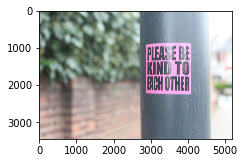

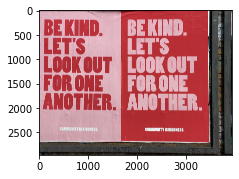

In [109]:
for idx,dir in enumerate(eng_path):
    plt.figure(figsize=(20,20))
    plt.subplot(2,5, idx+1)
    img_aa = img.imread(dir)
    plt.imshow(img_aa)
    a = str(idx)
    k =  os.path.join(out_eng, a )
    os.mkdir(k)
    list_en = crop_word_regions_eng(dir,k)
    recognize_images_eng(list_en)
    list_en = []
    print('---recognize_end---')
    print('\n')

2번째 이미지 때문에 해결이 되지 않는다.

#Step3. 테스트 결과 정리

## Keras-OCR  테스트 결과

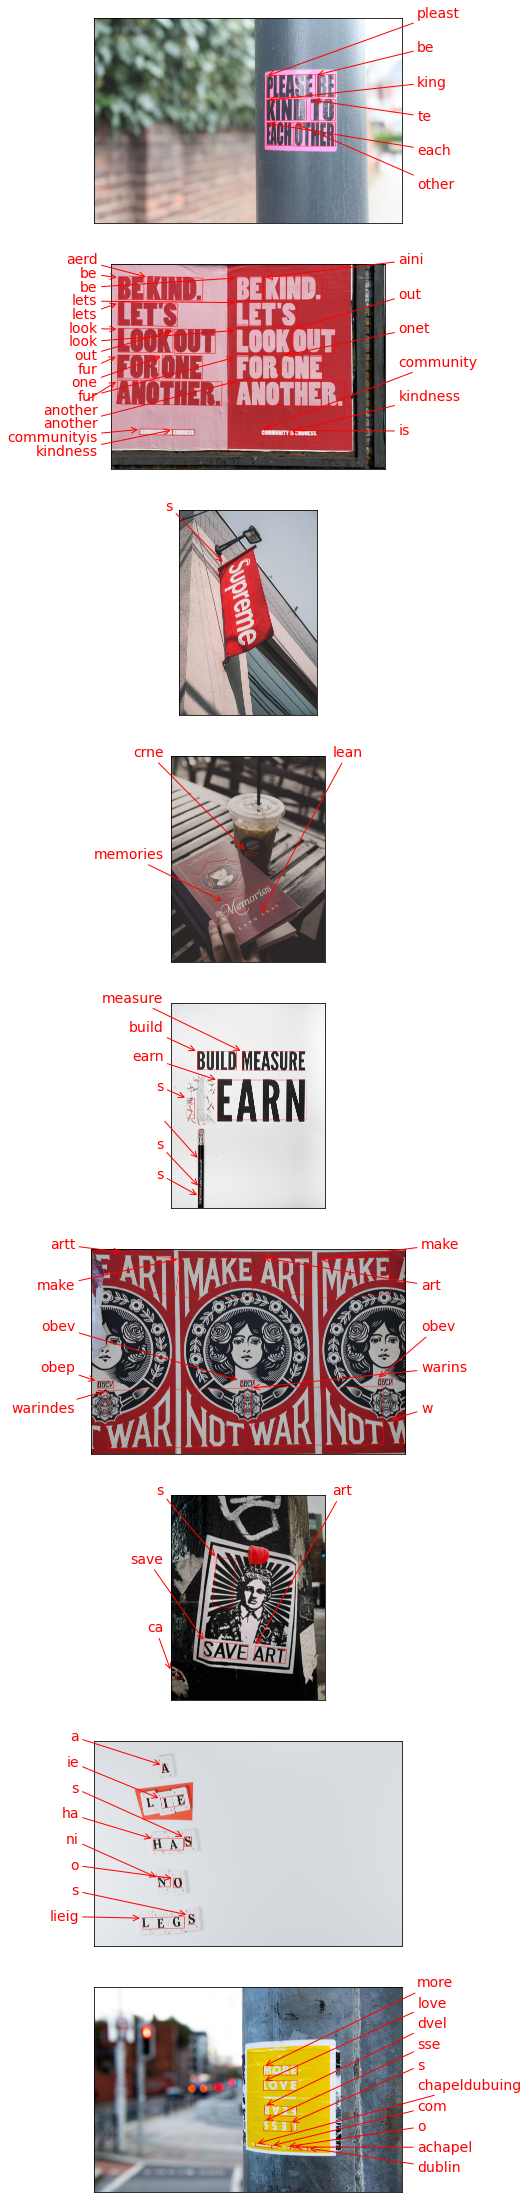

일부러 세로로 된 글자들과 삐딱한 글자들이 있는 사진을 가져와 인식시켜보았으나, 기대한 만큼 잘 인식한 사진은 별로 없었다.

## Tesseract-OCR 테스트 결과

Keras_OCR이 선녀로 보일만큼 인식을 못한다.

# Step4. 결과 분석과 결론 제시

## Keras-OCR 결과 분석

일단 글자들이 있는 부분을 인식하기는 한다. 하지만 정확도는 많이 떨어진다.

## Tesseract-OCR 결과 분석

일단 인식 시켰을때 Keras-OCR만큼 영역을 인식하지 못하고, 인식을 해도 

글자를 판별하지 못한다. 심지어 뭔지 모를 에러 때문에 제대로 실행도 안된다.

테서렉트는 확실히 기대 이하의 성능을 보여주었다.

## 회고.

더 좋은 모델 찾아서 써보고 싶다.